<a href="https://colab.research.google.com/github/JingwenLi173/Python-for-data-analysis/blob/main/LOOCV_and_ROC_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut 
from sklearn import  datasets

# load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)
# print(X,'\n',y)


(150, 4)
(150,)


In [8]:
# keep only two classes
X, y = X[y != 2], y[y != 2]
print(X.shape)
print(y.shape)
# print(X,'\n',y)


(100, 4)
(100,)


In [22]:
loo = LeaveOneOut()
loo.get_n_splits(X)
print("cross validation：",loo.get_n_splits(X))

y_pred = []
for train_index, test_index in loo.split(X):
    #print("train:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train, X_test, y_train, y_test)
    
    # train model
    model_bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), algorithm = "SAMME", n_estimators = 10)
    model_bdt.fit(X_train, y_train)
   
    # prediction
    x_test_pred = model_bdt.predict(X_test)
    
    # print(x_test_pred)
    y_pred.append(x_test_pred) # add prediction into table
  


cross validation： 100


In [23]:
from sklearn.metrics import roc_curve, auc

y_pred = np.array(y_pred) # list to array
print(y_pred.shape)
fpr, tpr, threshold = roc_curve(y, y_pred)  # calculate false pos rate and true pos rate
print(roc_curve(y, y_pred))
print(fpr, tpr, threshold)
roc_auc = auc(fpr, tpr)  # accuracy
print(roc_auc)


(100, 1)
(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0]))
[0. 0. 1.] [0. 1. 1.] [2 1 0]
1.0


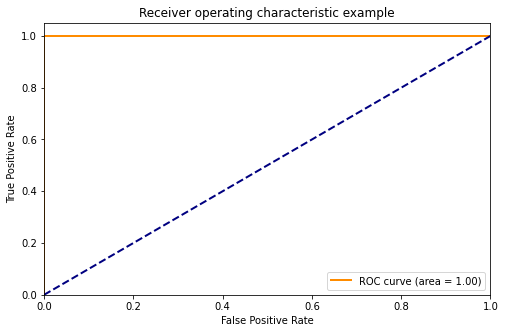

In [24]:
import matplotlib.pyplot as plt
lw = 2 # line width
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  ###false pos rate = x，true pos rate = y
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('loocv.png',dpi=600) # save image
plt.show()